# Starter Notebook

This initial notebook will step you through a few general aspects of working with the Jupyter Notebook environment to compose notebooks and to write and execute Python code.  You will also be introduced to the ArcGIS API for Python and ArcPy libraries.

If this is your first time working with a Jupyter notebook, you can orient yourself by following the *User Interface Tour* available in the *Help* menu.

## Notebook Cells

There are two types of cells that are typically used in a Jupyter notebook: *Markdown* and `Code`

When a cell is selected in the documented (e.g., by clicking on it), you can see the current cell type and change it using the dropdown menu displayed in the Jupyter notebook toolbar.

### Markdown Cells

This cell is an example of a Markdown cell.  Markdown cells in a Jupyter notebook enable you use standard Markdown syntax along with extended capabilities in the Jupyter Notebook environment to compose rich text with support for images and multimedia, mathematical equations, and embeded web components.

Double-click on a Markdown cell or select the cell and press `Enter` to edit the raw Markdown syntax.

Execute the cell (click the `Run` button above, or press `CTRL+Enter`) to view the rendered output.

### Code Cells

Code cells are where you execute all your Python code and produce the outputs you use to understand and vizualize patterns in your data and the results of your analyses.

Code cells can be activated and edited just like a Markdown cell.  However, the code remains visible in the input section of the cell (indicated on the left by the <span style="color:blue; font-family:monospace;">In [ ]</span> characters)

When a cell is executed (by clicking the `Run` button or pressing `CTRL+Enter`), the input cell appears momentarily with <span style="color:blue; font-family:monospace;">In [*]</span> while the commands are processed.  Once the code is complete, the input cell is labeled with a number indicating the sequential order it was most recently executed relative to other cells (e.g., <span style="color:blue; font-family:monospace;">In [1]</span> for the first executed cell).  If any output is returned by the cell, then it will have an output area appended with a corresponding label (e.g., <span style="color:red; font-family:monospace;">Out[1]</span>) and the results of the code will be displayed.

The next cell below is a code cell.  When executed, it will display the results of a simple mathematical calculation:

In [1]:
(18 * 3) - (20 / 5)

50.0

You can write and execute any standard python code, for example, to import Python modules and create variables.

When you execute a code cell that imports modules, defines functions, or creates variables, those resources become accessible to all other code cells in the current notebook (regardless of their position in the document) as long the current Python kernel session remains open.

After executing the cell below, try returning to the code cell that produced the error above, and executing it again.  You should now see the expected output from the code because you have defined the `current_date` variable as a new `datetime` object.

In [2]:
import datetime
current_date = datetime.datetime.now()
type(current_date)

datetime.datetime

The notebook interface is an interactive environment that enables you to easily experiment with your code.  If you execute the code cell below, you will see it procduce an error (because the `current_date` variable referenced in the code is not yet defined).

However, despite this error, you will be able to continue working in the current session without losing any progress:

In [3]:
print("Welcome to the ArcGIS Notebooks tutorial on {}!".format(
    current_date.strftime("%A, %B %d, %Y")
))

Welcome to the ArcGIS Notebooks tutorial on Tuesday, August 27, 2024!


One of the most popular modules for working with data in Python is the [Python Data Analysis Library](https://pandas.pydata.org/), or `pandas`.  This library provides the `DataFrame` object and associated functions that enhance *data wrangling* tasks in Python.

Loading data can be as simple as reading a basic CSV file.  For example:

In [4]:
import pandas as pd
toronto_wb = pd.read_csv('data/toronto/wb_civics_2011.csv')

In the Jupyter notebook environment, it is very easy to interact with `DataFrame` objects.  For reference, a Pandas Cheatsheet has been included with the workshop files (see `/arcgis_notebooks/documents/Pandas_Cheat_Sheet.pdf`).

For example, you can view the Toronto wellbeing data loaded above by simply returning the variable in the last line of any code cell - you will be presented with a sample preview of records from the top and bottom rows of the data frame, and a summary of its overall shape (rows x columns):  

In [5]:
toronto_wb

Neighbourhood  NeighbourhoodId  CityGrantsFunding  \
0               West Humber-Clairville                1           123283.0   
1    Mount Olive-Silverstone-Jamestown                2           238172.0   
2         Thistletown-Beaumond Heights                3             7296.0   
3                      Rexdale-Kipling                4            35100.0   
4                     Elms-Old Rexdale                5                0.0   
..                                 ...              ...                ...   
135                          West Hill              136            55370.0   
136                             Woburn              137           144255.0   
137                      Eglinton East              138             5800.0   
138                Scarborough Village              139             3200.0   
139                          Guildwood              140            11500.0   

     NeighbourhoodEquityScore  SalvationArmyDonors  WalkScore  WatermainBreaks  
0                       45.78                  640         57               30  
1                       29.29                  222         61                8  
2                       39.78                  218         54                9  
3                       43.76                  336         58                5  
4                       29.54                  152         48               10  
..                        ...                  ...        ...              ...  
135                     37.25                  765         66                8  
136                     39.01                 1429         66               22  
137                     36.28                  396         62                5  
138                     33.94                  410         70                6  
139                     66.19                  903         59               14  

[140 rows x 7 columns]

Plots can be generated easily in a variety of ways.  For example, to generate a simple scatter plot of the equity score vs number of donors to the Salvation Army in Toronto's neighbourhoods:

<AxesSubplot: xlabel='SalvationArmyDonors', ylabel='NeighbourhoodEquityScore'>

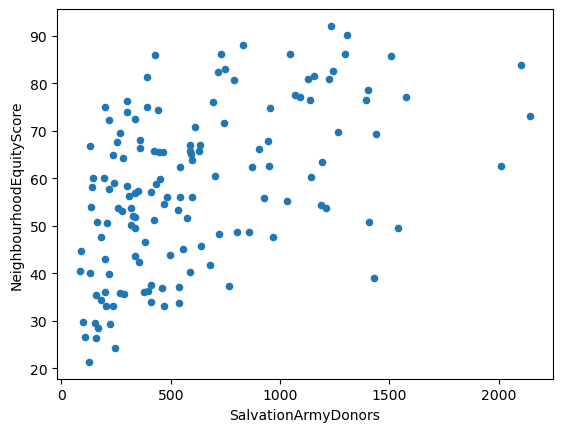

In [6]:
toronto_wb.plot.scatter(x="SalvationArmyDonors", y="NeighbourhoodEquityScore")

Execute the cell below to use the `qcut()` method to classify the toronto neighbourhoods into five groups based on quantile rank of the equity score, and add the quantile ranks as a new column in the `toronto_wb` data frame object:

In [7]:
toronto_wb['equity_quantile_rank'] = pd.qcut(toronto_wb['NeighbourhoodEquityScore'], q=5, labels=False)

Preview the data frame with the new 'equity_quantile_rank' column added to it by executing the next cell:

In [8]:
toronto_wb

Neighbourhood  NeighbourhoodId  CityGrantsFunding  \
0               West Humber-Clairville                1           123283.0   
1    Mount Olive-Silverstone-Jamestown                2           238172.0   
2         Thistletown-Beaumond Heights                3             7296.0   
3                      Rexdale-Kipling                4            35100.0   
4                     Elms-Old Rexdale                5                0.0   
..                                 ...              ...                ...   
135                          West Hill              136            55370.0   
136                             Woburn              137           144255.0   
137                      Eglinton East              138             5800.0   
138                Scarborough Village              139             3200.0   
139                          Guildwood              140            11500.0   

     NeighbourhoodEquityScore  SalvationArmyDonors  WalkScore  \
0                       45.78                  640         57   
1                       29.29                  222         61   
2                       39.78                  218         54   
3                       43.76                  336         58   
4                       29.54                  152         48   
..                        ...                  ...        ...   
135                     37.25                  765         66   
136                     39.01                 1429         66   
137                     36.28                  396         62   
138                     33.94                  410         70   
139                     66.19                  903         59   

     WatermainBreaks  equity_quantile_rank  
0                 30                     1  
1                  8                     0  
2                  9                     0  
3                  5                     1  
4                 10                     0  
..               ...                   ...  
135                8                     0  
136               22                     0  
137                5                     0  
138                6                     0  
139               14                     3  

[140 rows x 8 columns]

Summarize the data by quantile rank by grouping them by the `equity_quanitile_rank` function, executing the `sum()` function, and dropping the summary for the `NeighbourhoodId` column.  Note that you return the newly-created `toronto_wb_sum` data frame on the last line of the cell in order to preview the result immediately after it is created:

In [9]:
toronto_wb_sum = toronto_wb.groupby("equity_quantile_rank").sum().drop(columns=["NeighbourhoodId"])
toronto_wb_sum

Neighbourhood  \
equity_quantile_rank                                                      
0                     Mount Olive-Silverstone-JamestownThistletown-B...   
1                     West Humber-ClairvilleRexdale-KiplingKingsview...   
2                     Willowridge-Martingrove-RichviewHumber Heights...   
3                     Edenbridge-Humber ValleyStonegate-QueenswayAld...   
4                     Princess-RosethornMarkland WoodKingsway SouthL...   

                      CityGrantsFunding  NeighbourhoodEquityScore  \
equity_quantile_rank                                                
0                             1929788.0                    940.99   
1                             2438590.0                   1347.03   
2                              962599.0                   1620.38   
3                             2122046.0                   1904.17   
4                             6433435.0                   2277.89   

                      SalvationArmyDonors  WalkScore  WatermainBreaks  
equity_quantile_rank                                                   
0                                    9531       1821              212  
1                                   14116       1944              190  
2                                   16588       1976              270  
3                                   17393       2130              238  
4                                   28067       2247              197

Plot some bar charts using the built-in plot functions of the `DataFrame` object type:

<AxesSubplot: xlabel='equity_quantile_rank'>

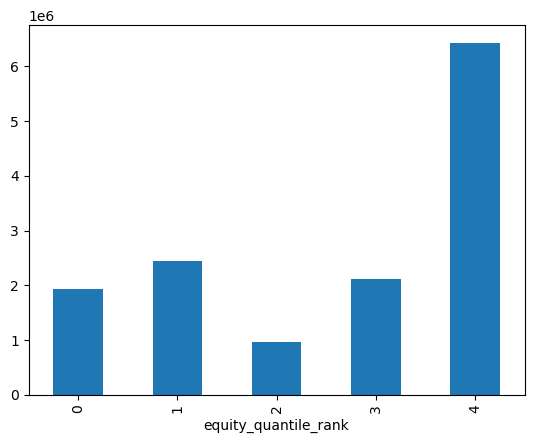

In [10]:
toronto_wb_sum["CityGrantsFunding"].plot.bar()

<AxesSubplot: xlabel='equity_quantile_rank'>

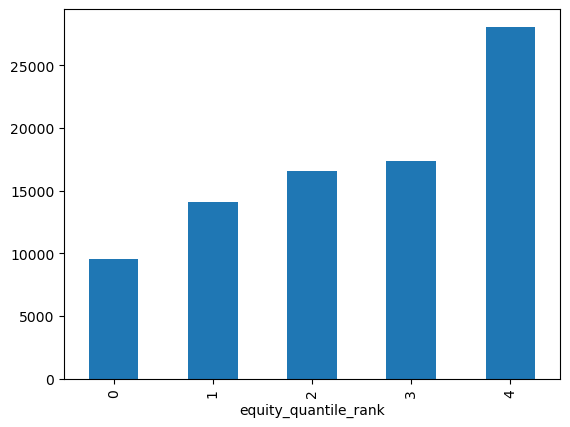

In [11]:
toronto_wb_sum["SalvationArmyDonors"].plot.bar()

<AxesSubplot: xlabel='equity_quantile_rank'>

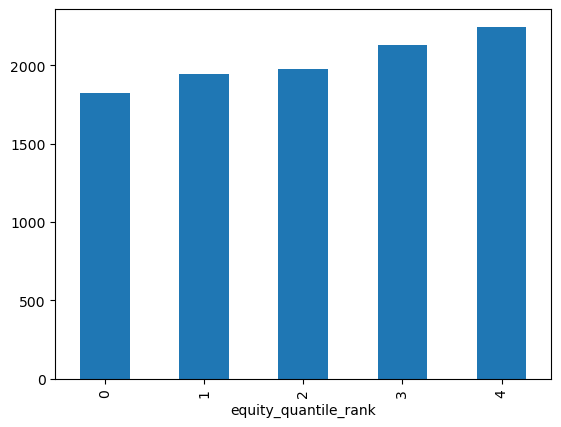

In [12]:
toronto_wb_sum["WalkScore"].plot.bar()

<AxesSubplot: xlabel='equity_quantile_rank'>

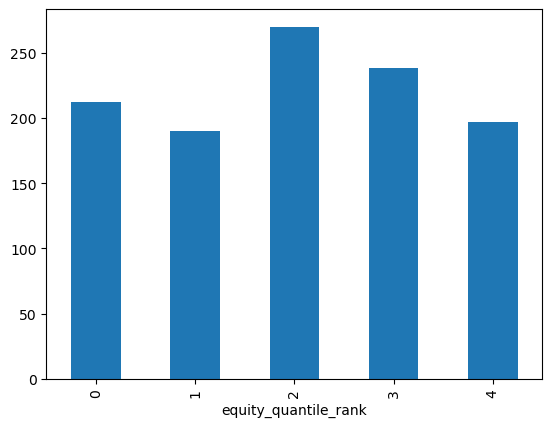

In [13]:
toronto_wb_sum["WatermainBreaks"].plot.bar()

From comparing the charts above, you could conclude that there is a positive relationship between the quantile ranks calculcated based on the equity quantile rank and the `CityGrantsFunding`, `SalvationArmyDonors`, and `WalkScore` recorded for Toronto neighbourhoods.  The association between the equity quantile rank and `WatermainBreaks` appears more random.

---

Up to this point, this section has demonstrated the basics of working with code cells to execute Python code in a notebook.  You have seen how you can load modules, read and manipulate data, and visualize data as simple raw values, as tabular previous, and as graphics generated by plotting capabilities.

The next section dicuses briefly how you can work with the Markdown cells to interlace your code with content that helps add a narrative to your analyses.

## Markdown cells

Markdown is a lightweight plain-text-formatting markup language.  With this simple syntax, it is easy to apply *common* **style** ***properties*** to text, compose lists and tables, embed links, blockquotes, and formulas, and insert images and multimedia.  There are many examples of how to write Markdown readily found online.  For reference, a [Jupyter Notebook cheatsheet](/files/documents/Jupyter_Cheatsheet.pdf) has provided with the workshop files that includes an overview Markdown syntax for composing common elements of a document.

### Inserting images

You can easily incorporate and images in your text with standard Markdown syntax.  The image below is a copy of the desktop wallpaper available for download from Esri's [website](https://www.esri.com/en-us/landing-page/corporate-programs/2019/download-images):

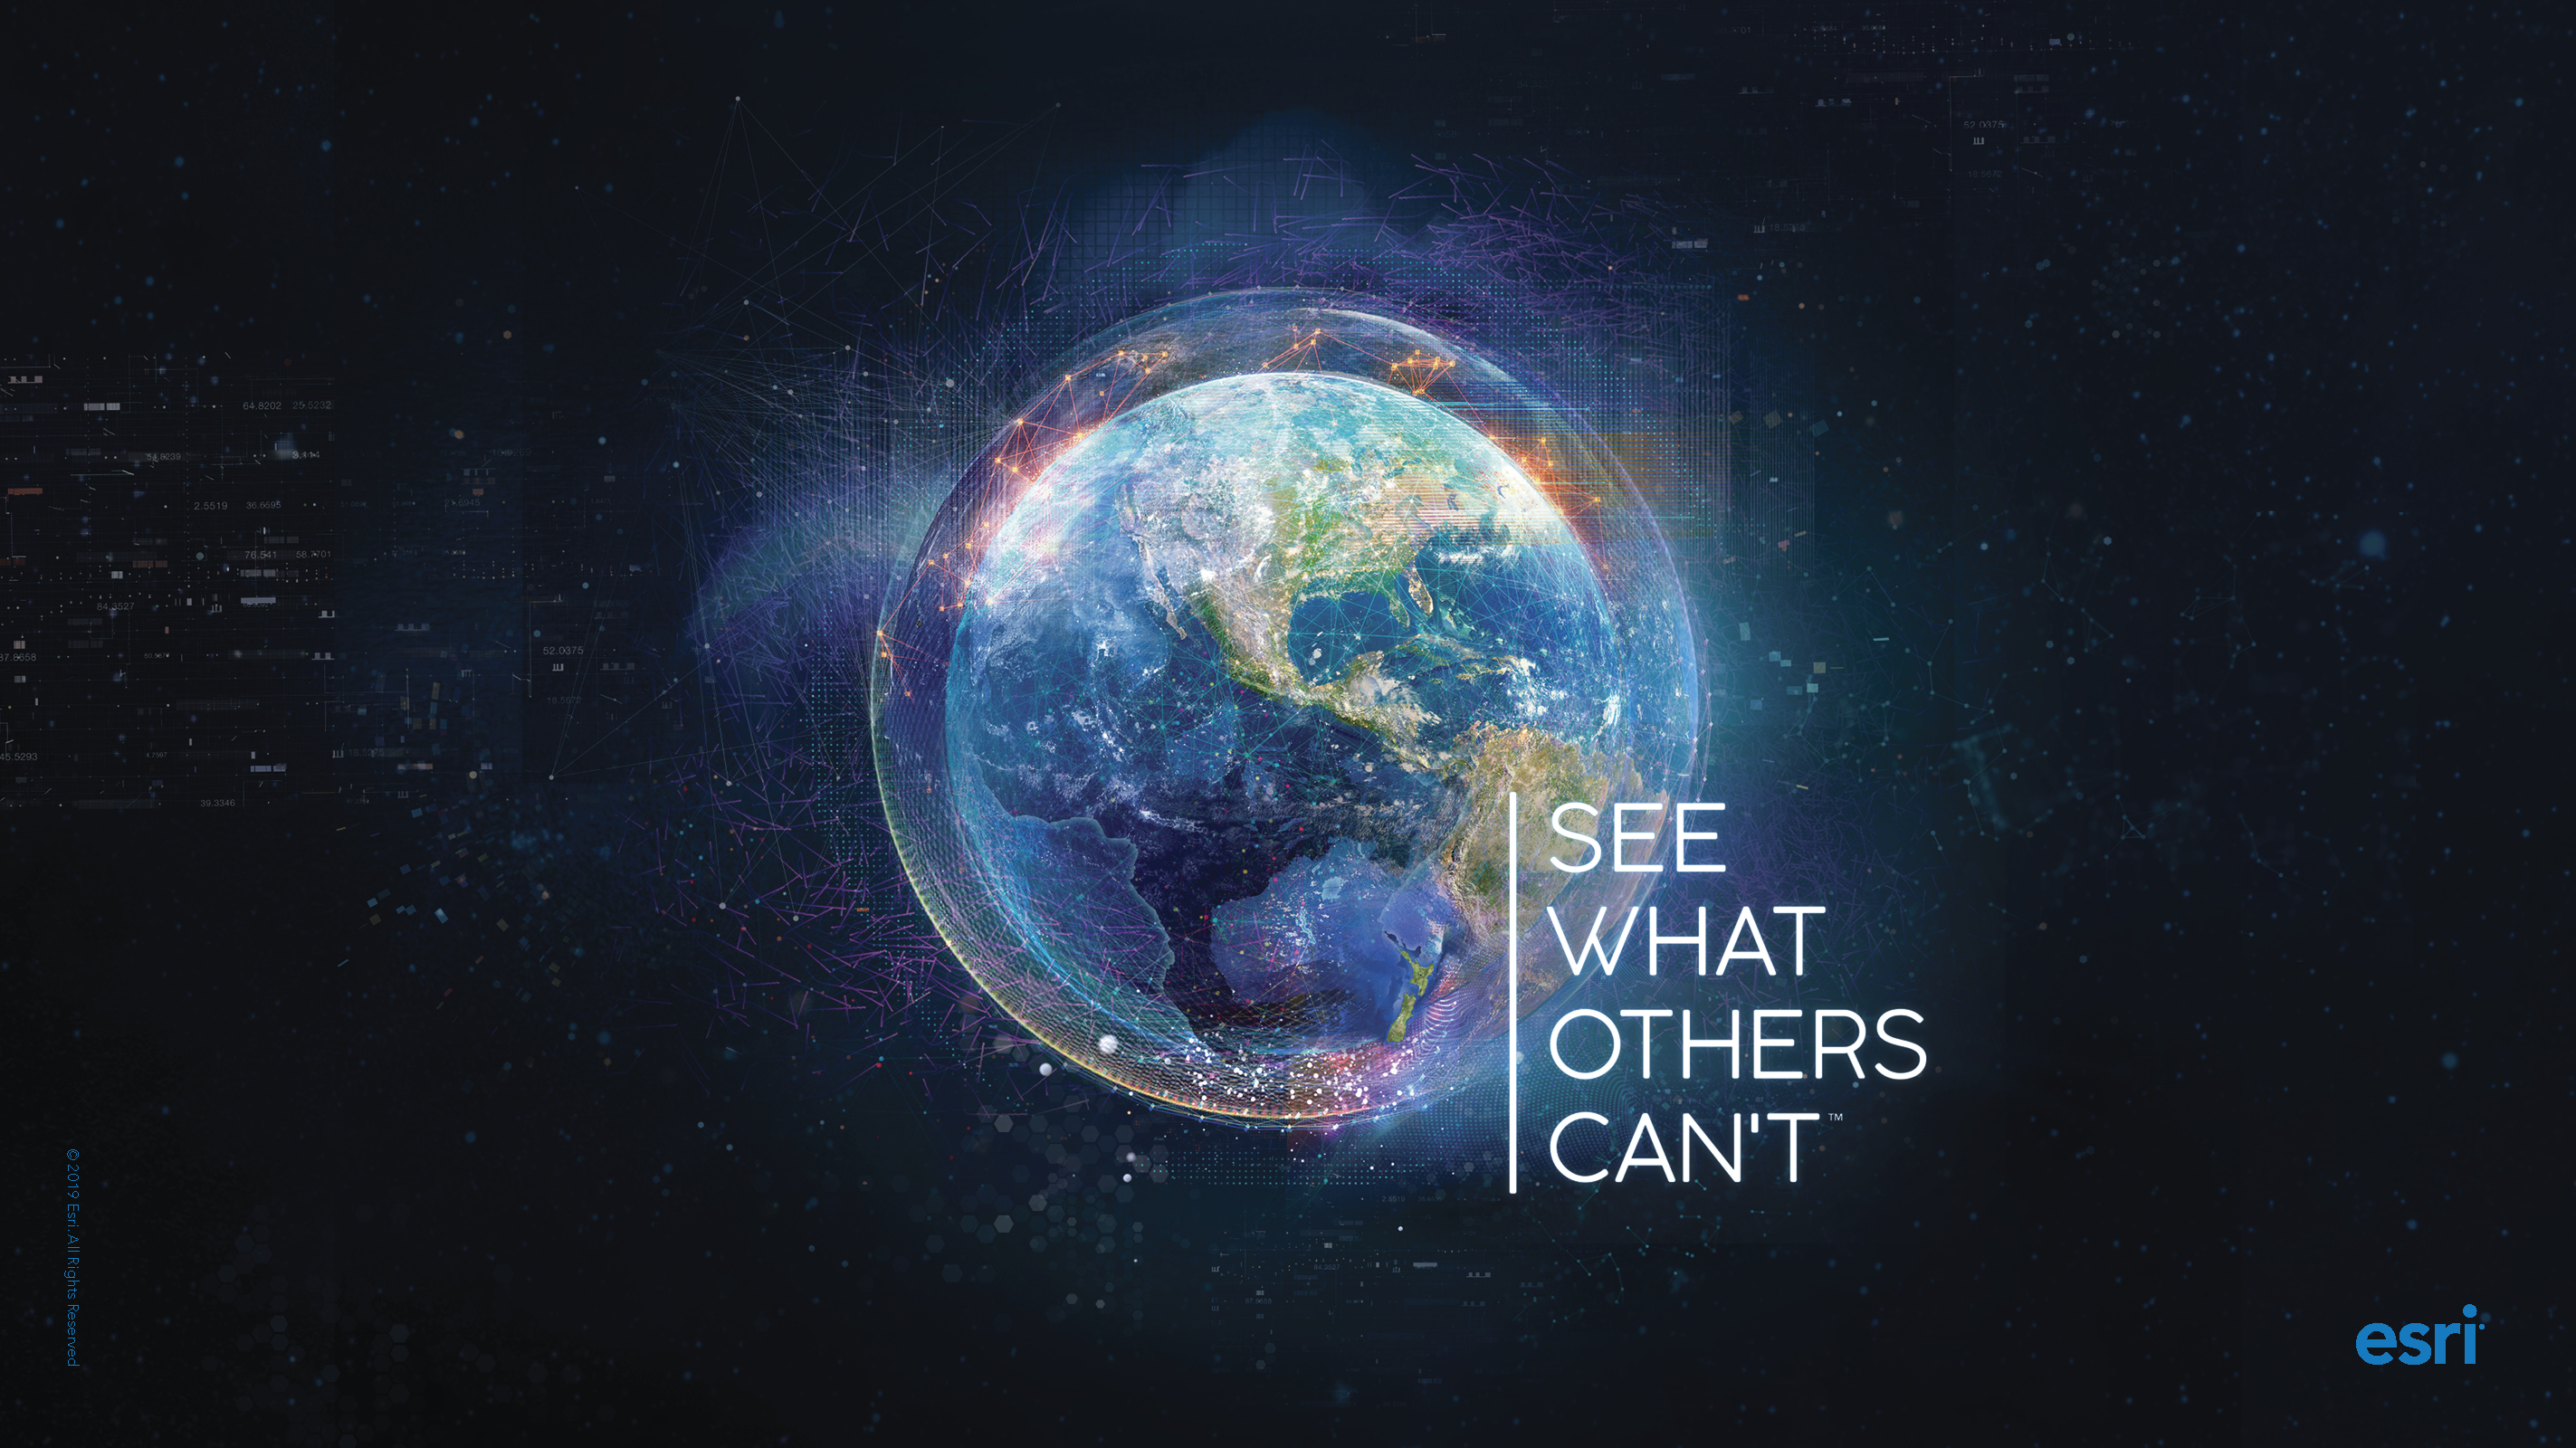

To display this image, a copy of it has been included in an `images` folder that is placed in the same path that contains this `starter_notebook.ipynb` file.  When this notebook is shared, it must include the corresponding `images` folder and its contents for a recipient to be able to view it properly.  If the image files are forgotten or misplaced relative to the notbook, then the notebook will appear incomplete. An alternative approach would be to substitute the URL to the original file hosted on Esri's website.  However, if the image is large, it may be slow to load.  Also the URL to a remote website could be inaccessible if no Internet connection is available, or if the remote website changes in the future. 

To avoid problems with this, the image can be embedded within this notebook.  Try this by editing this Markdown cell and performing the following steps:
1. Remove the markdown that inserts the image from the `images` directory, and leave the cursor on the same line.
1. In the *Edit* menu select *Insert Image*.
1. In the dialog that opens, navigate into the `arcgis_notebooks/notebook_basics/images` folder, select the `seewhatotherscant.jpg` image, and click *OK* - notice that you now have a new line of Markdown code with the syntax for loading an image, except the URL/path portion of it is referencing `attachment:seewhatotherscant.jpg`).
1. Execute this Markdown cell to see the results (e.g., press `CTRL+Enter`)

After completing the steps outlined in the list above, this notebook will no longer need to include images folder when it is shared with others.

### Inserting Formulas

Any mathematical formula can be embedded inline by enclosing them inside `$` characters, for example: $a + b = c$

To express an equation on its own line, use double `$$` characters: $$ArcGIS + Python + Jupyter = 💥$$

In a Jupyter notebook, you may also use LaTeX to compose your formulas.  For example, to represent a formula for [converting from cartesion to spherical coordinates](http://equplus.net/eqninfo/Equation-348.html):

$$
\begin{array}{*{20}c} {x = R\sin \theta \cos \phi } & {R = \sqrt {x^2 + y^2 + z^2 } } & {} \\ {y = R\sin \theta \sin \phi } & {\phi = \tan ^{ - 1} \left( {\frac{y}{x}} \right)} & {} \\ {z = R\cos \theta } & {\theta = \cos ^{ - 1} \left( {\frac{z}{{\sqrt {x^2 + y^2 + z^2 } }}} \right)} & {} \\ \end{array}
$$

### Adding multimedia

There may be times when you need to embed more complex content into your notebooks, such as snippets of HTML or JavaScript code, or interactive multimedia.  These kinds of elements often do not have Markdown syntax available to represent them.

However, the IPython [display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html) module has a variety of functions that can help insert useful content into your notebooks.  These must be executed from `code` cells, and not Markdown cells.

For example, to embed Esri's promotional video from YouTube, execute the code cell below:

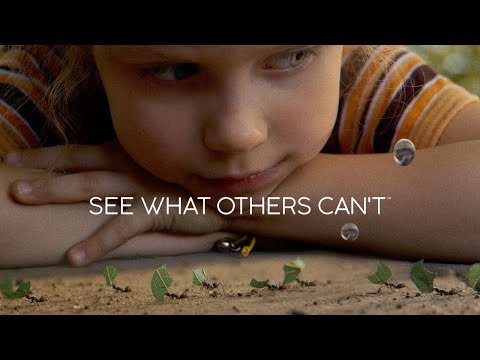

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="lXYFhgntmjg", width=800, height=450)

# from IPython.display import Image
# Image("images/video.png")

## Working with ArcGIS

There are two libraries available for working with ArcGIS in Python: **ArcPy** and the **ArcGIS API for Python**.

Most users of ArcGIS on the desktop will be familar with **ArcPy** (`arcpy` in Python code).  The ArcPy library provides access to the complete desktop geoprocessing framework that ArcGIS users have been working with for many years.

The **ArcGIS API for Python** (`arcgis` in Python code) is a relatively new library released by Esri.  It enables powerful spatial analysis, mapping, and GIS data processing, fully integrated with ArcGIS Online and ArcGIS Enterprise.  This library comes pre-installed with the Python environment is installed with ArcGIS Pro, but may installed separately on *any* system with a Python 3 environment.  Although the `arcgis` library can be installed and used on its own, when it is loaded in a Python environment that includes the `arcpy`, it will integrate with desktop geoprocessing capaiblities to provide enhanced functionality. 

### Explore ArcPy

Getting started with ArcPy is as simple as executing `import arcpy` in a python code cell.  Samples later in this workshop will make use of the ArcPy geoprocessing framework.  For now, you will learn how to explore what `arcpy` has to offer within the Python notebook environment.

Start by executing the following cell to load the `arcpy` module:

In [15]:
import arcpy

Wait until the cell finishes executing (you will see the `*` character change to a number).

Next, place your cursor at the end of the code in the following cell, and press the `Tab` key to see a list of available functions in the `arcpy.managment` module.  Depending on the module (e.g., how many functions it provides), it may take a moment for a list to appear:

In [ ]:
arcpy.management.

In this example, you will be presented with a list of functions you use from the `arcpy.management` module.  If you have already spent some time working with ArcGIS desktop software, even if you haven't been writing any Python code before now, you likely will recognize many of these functions, as they correspond with the tools available in the ArcGIS geoprocessing toolbox.

If you need to know more about a specific function, select it from the dropdown list or type it into the code cell.  With your cursor placed immediately after the function name, or inside the arguments parentheses `()`, press `SHIFT+Tab` to display a popup with documentation for the corresponding function.

Try this with the ReconstructTracks function that corresponds to the same tool in the GeoAnalytics toolbox available in ArcGIS Pro: 

In [ ]:
arcpy.gapro.ReconstructTracks()

Press `SHIFT+Tab` a second time, and the popup will expand to show a bit more.  A third time, and the box will linger on the screen for 10 seconds while you continue typing.  After a fourth time, a full documentation panel will be opened and will stay visible on screen (until the close button is clicked) with the function documentation displayed in it.

An alternative shortcut to display the full documentation in a persistent window is to execute the function name as a line of code with a `?` character on the end of it:

In [ ]:
arcpy.gapro.ReconstructTracks?

### Explore the ArcGIS API for Python

With the `arcgis` library being designed for seamless integration with ArcGIS Online and ArcGIS Enterpise, a typical Python script using this library will begin by importing the GIS module and establing a connection to an ArcGIS Online or Enterprise portal.

In [16]:
from arcgis.gis import GIS
gis = GIS()

#### Connecting to your GIS

Without any arguments, the result of the `GIS()` function will be an anonymous connection to ArcGIS Online.  To connect to a specific portal, and to authenticate with your own user account, you must provide a URL, username, and password as arguments to the `GIS()` function.

However, it is good practice to avoid storing your passwords in Python code (i.e., as plain text), especially if you intend to share your notebook with others.

One approach to deal with this is to simply omit your password from the `GIS()` function call, and every time the code is executed, the notebook will interactively prompt for a password.

In the code sample below, replace the username variable with your ArcGIS Online (or Enterprise) username.  If you are using an ArcGIS Enterprise login, then also replace the portal variable with the URL to your enterprise portal (e.g., https://my.enterprise.portal.abc/arcgis/):

In [17]:
username = "user_name"
portal = "https://www.arcgis.com"

gis = GIS(username=username)

Enter password: ········


#### Creating a secure connection profile

You may want to avoid having a notebook prompt for your password every time your code runs.  If you are running your notebook in a Windows environment (or a Mac/Linux environment with necessary [prerequisites configured](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#macOS)), you can provide your password and set a profile name when you connect for the first time.

In the code below, replace the password temporarily with your current password.  After you successfully connect, your crendials will be securely saved under a profile named `nbprofile`.  **Remove your password from the code cell after this is completed!**
Note: if your password start with special character you may need to replace double quotes `"` with the the single quotes `'`

In [18]:
gis = GIS(portal, username, 'password', profile="nbprofile")

Now that you have your credentials stored securely in a profile, you no longer need your username or password to connect with your account.  You can simply execute the `GIS()` function and specify the profile as a named parameter:

In [19]:
gis = GIS(profile="nbprofile")

#### Access and view data in ArcGIS Online or ArcGIS Enterprise

With a connection to your portal, you can search for content, such as Feature Layers:

In [20]:
search_result = gis.content.search(query="Physiography", item_type="Feature Layer", outside_org=True)
search_result

[<Item title:"US_PhysiographicProvinces" type:Feature Layer Collection owner:marshallrobinson>,
 <Item title:"North America Terrestrial Ecoregions Level 1" type:Feature Layer Collection owner:CECAtlas>,
 <Item title:"North America Terrestrial Ecoregions Level 3" type:Feature Layer Collection owner:CECAtlas>,
 <Item title:"North America Terrestrial Ecoregions Level 2" type:Feature Layer Collection owner:CECAtlas>,
 <Item title:"Canada's Physiographic Regions " type:Feature Layer Collection owner:EsriCanadaEducation>,
 <Item title:"Virginia EPA Eco region" type:Feature Layer Collection owner:gisjazzy26>,
 <Item title:"TtestResultsandSig_WFL1" type:Feature Layer Collection owner:al570508_DalSpatial>,
 <Item title:"Copernicus Amatrice" type:Feature Layer Collection owner:ebrabec_UMass_Amherst>,
 <Item title:"WorldGeo_Physical_features" type:Feature Layer Collection owner:Maps.com_carto>,
 <Item title:"Physiography_Areas" type:Feature Layer Collection owner:bruceconrad4>]

Based on the search results, adjust the item number to retrieve the correct result using `search_result[?]`. Count the items from the top to find those belonging to Esri Canada Education (owner: EsriCanadaEducation). The correct index is always `n-1`. 

<Item title:"Canada's Physiographic Regions " type:Feature Layer Collection owner:EsriCanadaEducation>
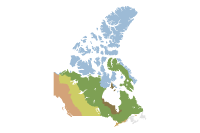

In [21]:
physiography = search_result[4]
physiography

Display the layer in a live map widget:

In [22]:
map1 = gis.map("Canada")
map1

MapView(layout=Layout(height='400px', width='100%'))

In [30]:
map1.add_layer(physiography)

#### Spatially Enabled Data Frames

A powerful feature that the `arcgis` library introduces is the [`Spatially Enabled Data Frame`](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/).  This adds geospatial functionality to the standard Pandas `DataFrame` object.

Loading data into a spatially enabled dataframe is fairly simple.  For example, the `from_layer` function that is available in the spatial extension added by `arcgis` to the pandas `DataFrame` object can be used to load data directly from a feature layer in ArcGIS Online or ArcGIS Enterprise:

In [24]:
physiography_sdf = pd.DataFrame.spatial.from_layer(physiography.layers[0])
physiography_sdf

OBJECTID                           Phys_Reg Name_FR  \
0         1                 Appalachian Region    <NA>   
1         2               Arctic and Subarctic    <NA>   
2         3                    Canadian Shield    <NA>   
3         4                         Cordillera    <NA>   
4         5  Great Lakes-St. Lawrence Lowlands    <NA>   
5         6                Hudson Bay Lowlands    <NA>   
6         7                    Interior Plains    <NA>   

                                                Nom  \
0                  Les hautes-terres appalachiennes   
1                          Les terres de l’Arctique   
2                              Le Bouclier canadien   
3                          La Cordillère canadienne   
4  Les basses-terres du Saint-Laurent - Grands-Lacs   
5                La basse-terre de la baie d’Hudson   
6                           Les Plaines intérieures   

                                               SHAPE  
0  {"rings": [[[-6781921.6481, 5711722.0132], [-6...  
1  {"rings": [[[-8890825.3384, 8754539.3981], [-8...  
2  {"rings": [[[-15017068, 10729668], [-15016604,...  
3  {"rings": [[[-13705404.511, 6239355.3591], [-1...  
4  {"rings": [[[-9198651.9259, 5134431.6592], [-9...  
5  {"rings": [[[-8982275.2708, 6654363.9202], [-8...  
6  {"rings": [[[-11284196, 6274638], [-11291832, ...

Once in memory, the spatially enabled data frame includes all of the capabilities of a regular Pandas `DataFrame` object for working with tabular data.  It also includes an additional `SHAPE` column that describes the geometry associated with each record in the table, and enables the data frame to be used with a variety of spatial functions provided by the `arcgis` libary.

For example, addtional spatial functionality for spatially enabled `DataFrame` objects can be accessed through the `spatial` property. To preview the various spatial functions available with a spatially enabled data frame object, place the cursor at the end of the line of code in the next cell, and press the `Tab` key:

In [ ]:
physiography_sdf.spatial.

Depending on what other Python modules you need to use in your analysis, you may need to manipulate or prepare your data in different ways.  For example, you may need to represent your data as a simple text representation of GeoJSON.  Do do this, you can execute the following two lines to convert the spatially enabled data frame to a `FeatureSet` object (from the `arcgis.features` module).  A `FeatureSet` object provides a property that converts its contents to GeoJSON text format:

In [25]:
physiography_fset = physiography_sdf.spatial.to_featureset()
physiography_fset.to_geojson

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "MultiPolygon", "coordinates": [[[-6781921.6481, 5711722.0132], [-6781333.9219, 5711148.1738], [-6780437.037, 5711014.72], [-6780622.1812, 5711810.5646], [-6780158.4414, 5712648.9402], [-6779292.981, 5712561.5707], [-6777035.5027, 5710175.2436], [-6776880.9336, 5709424.4224], [-6777468.6748, 5708585.1379], [-6778056.4108, 5708233.4418], [-6780406.4944, 5707879.3528], [-6783282.3177, 5706775.899], [-6784549.5186, 5705893.2231], [-6785106.6813, 5705318.5578], [-6786220.162, 5703729.3232], [-6786282.171, 5702936.6247], [-6786127.6019, 5702186.4114], [-6785787.0304, 5701479.8847], [-6784890.1575, 5700200.2774], [-6787673.4266, 5696979.1002], [-6789714.3854, 5693849.8836], [-6790426.1222, 5693541.1441], [-6791261.0055, 5693761.5125], [-6791848.7318, 5694334.2368], [-6792559.611, 5694819.812], [-6792744.7554, 5695613.005], [-6790859.2391, 5697199.5781], [-6790364.0767, 5697817.3303], [-6790270.6329, 5699538.

Some of the capabilities for working with spatially enabled data frame objects will be explored in more detail one of the later notebooks of this tutorial.

#### Exporting GIS datasets

When you are finished performing analysis in your notebook, you will likely want to save your results to datasets that can be used in other contexts, or shared to others.

For example, to save your data to a new feature class in your local filesystem, you can easily excute the `to_featureclass` function.

Execute the two lines of code below to create a new file geodatabase, and write the physiography data frame to a new feature class:

In [ ]:
arcpy.management.CreateFileGDB('data','output.gdb')
physiography_sdf.spatial.to_featureclass('data/output.gdb/physiography')

Alternatively, you can publish your data directly to your ArcgGIS Online or ArcGIS Enterprise content as a new feature layer, enabling you to use it in ArcGIS web maps, story maps, dashboards, etc.:

In [27]:
physiography_layer = physiography_sdf.spatial.to_featurelayer("physiography_sample")

In [28]:
physiography_layer

<Item title:"physiography_sample" type:Feature Layer Collection owner:ssattar_edu>

This starter notebook has provided you with a brief overview of how to compose Jupyter Notebook documents that interlace rich text and multimedia with Python code for processing, analyzing, and visualizing data.  You have learned how to work with the Jupyter interface to create and control Markdown and code cells.  The `arcgis` and `arcpy` libraries were introduced, showing how you can bring GIS data and functionality into your Python Notebooks, enhancing your notebooks with the capabilities needed to conduct advanced geospatial data science and data vizualization.

Proceed to the two additional notebooks provided in the same folder as this notebook to learn about additional features that are specifically unique to *ArcGIS Notebooks* in two different contexts:
* **ArcGIS Pro**: to learn about working with ArcGIS Notebooks integrated within the ArcGIS Pro desktop software, open the `notebook_basics.aprx` project file in ArcGIS Pro, expand the Notebooks item in the Catalog pane, and double-click on the `arcgispro_notebook.ipynb` notebook item.
* **ArcGIS Enterprise** / **ArcGIS Online**: to learn about working with *hosted* ArcGIS Notebooks integrated within ArcGIS Enterprise or ArcGIS Online, login to your portal online, upload the `hosted_notebook.ipynb` as a new item, then click the 'Open Notebook' button on the item's details page.
> Note: if you don't have access to an ArcGIS Online or Enterprise account with hosted ArcGIS Notebooks enabled, you can run the notebook using your local Jupyter Notebook server.  However, you will need to replace the `GIS()` connection parameters to authenticate with your ArcGIS Online/Enteprise account over the Internet.  You also will not have access to the same UI shortcuts that are referenced by this notebook (but you may insert code manually to achieve the same results and complete the notebook).

You may execute the code in this final cell to cleanup the items created in ArcGIS Online and in your local files:

In [29]:
#physiography_layer.related_items("Service2Data")[0].delete()  # Delete the underlying service/data item for the feature layer
physiography_layer.delete()  # Delete the feature layer
arcpy.management.Delete('data/output.gdb')  # Delete the file geodatabase (and the feature class stored within it)

<Result 'true'>